In [8]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ptk

sns.set(style="whitegrid")
%matplotlib inline


In [9]:
corpes_df = pd.read_csv('./clean_tweets_corpes.csv')
tweets_df = pd.read_csv('./original_tweets_corpes.csv')
tweets_df['tweet_dates']= pd.to_datetime(tweets_df['tweet_dates'], errors = 'coerce')

In [10]:
tweets_df.head()

,source,text,retweet_count,favorite_count,is_retweet,tweet_dates
0,Twitter for iPhone,“Congressman Van Drew (D-NJ) SLAMS Democrats f...,2765.0,9167.0,False,2019-11-18 16:06:19
1,Twitter for iPhone,Just finished a very good &amp; cordial meetin...,3193.0,12462.0,False,2019-11-18 16:01:42
2,Twitter for iPhone,Just finished a very good &amp; cordial meetin...,2523.0,8981.0,False,2019-11-18 15:49:55
3,Twitter for iPhone,....that I testify about the phony Impeachment...,7224.0,26868.0,False,2019-11-18 13:52:24
4,Twitter for iPhone,Our Crazy Do Nothing (where’s USMCA infrastruc...,9905.0,33588.0,False,2019-11-18 13:52:22


Text(0.5, 1.0, 'Platforms used to tweet over 10 years')

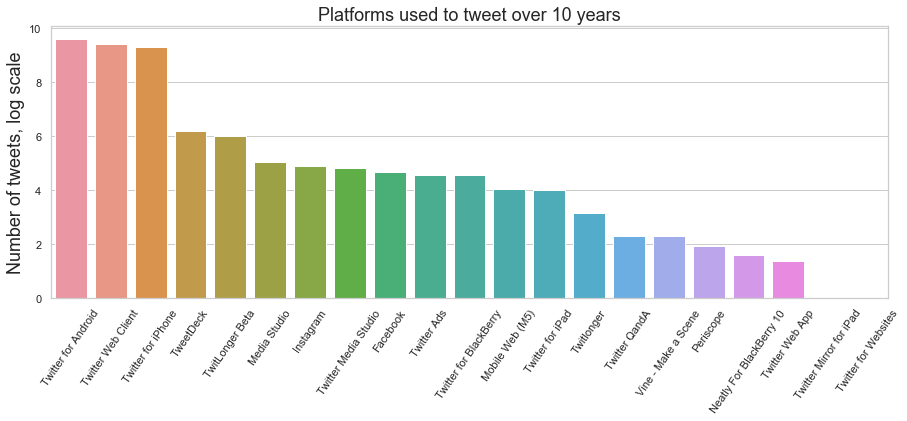

In [11]:
source_vc = tweets_df["source"].value_counts()
plt.figure(figsize = (15,5))
source_graph = sns.barplot(x=source_vc.index,y = np.log(source_vc.values))
source_graph.set_xticklabels(source_graph.get_xticklabels(),rotation=55);
plt.ylabel('Number of tweets, log scale', size = 18)
plt.title('Platforms used to tweet over 10 years', fontsize = 18)

In [12]:
year = tweets_df['tweet_dates'].dt.year

Text(0.5, 1.0, 'Which year has he tweeted the most?')

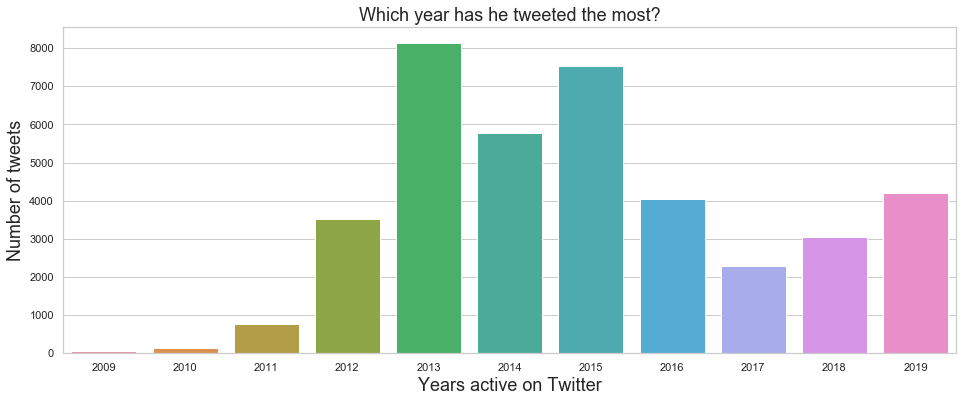

In [13]:
year_value_counts = tweets_df['tweet_dates'].dt.year.value_counts()
plt.figure(figsize = (16,6))
sns.barplot(x = year_value_counts.index, y = year_value_counts.values);
plt.xlabel('Years active on Twitter', fontsize = 18)
plt.ylabel('Number of tweets', fontsize = 18)
plt.title('Which year has he tweeted the most?', fontsize = 18)

Text(0, 0.5, 'Frequence of tweets')

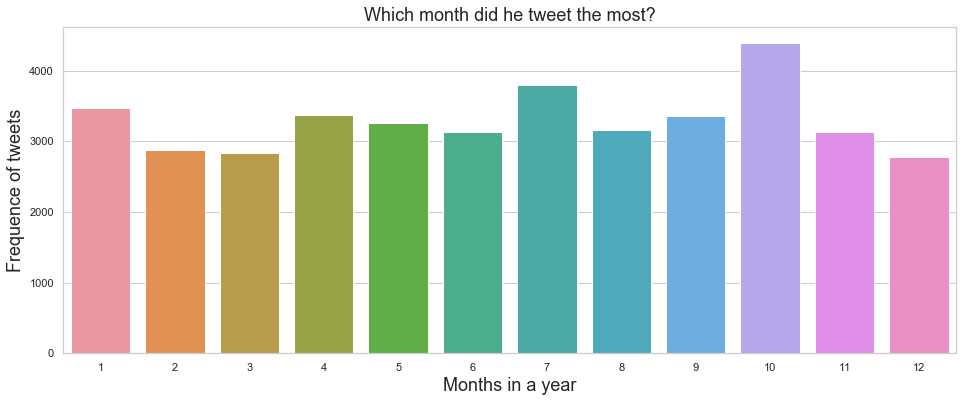

In [14]:
months = tweets_df['tweet_dates'].dt.month
months_value_counts = months.value_counts().sort_index()
plt.figure(figsize = (16,6))
sns.barplot(x = months_value_counts.index, y = months_value_counts.values);
plt.title('Which month did he tweet the most?', fontsize = 18)
plt.xlabel('Months in a year', fontsize = 18)
plt.ylabel('Frequence of tweets', fontsize = 18)

In [15]:
sns.set_style("whitegrid")

In [16]:
twenty_nineteen_mask = tweets_df['tweet_dates'].dt.year == 2019
this_year_value_count = tweets_df[twenty_nineteen_mask]['tweet_dates'].dt.month.value_counts()

Text(0, 0.5, 'Frequence of tweets')

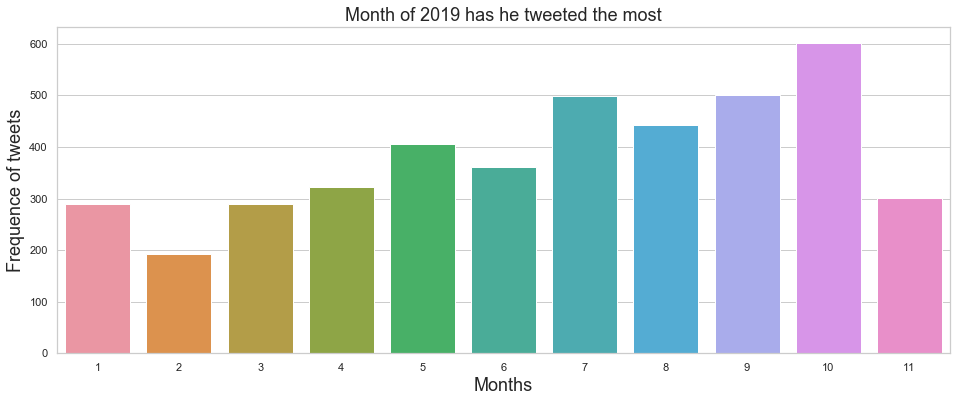

In [17]:
plt.figure(figsize = (16,6))
sns.barplot(x = this_year_value_count.index, y = this_year_value_count.values);

plt.title('Month of 2019 has he tweeted the most', fontsize = 18)
plt.xlabel('Months', fontsize = 18)
plt.ylabel('Frequence of tweets', fontsize = 18)

Text(0.5, 1.0, 'Which day in the month does he tweet the most?')

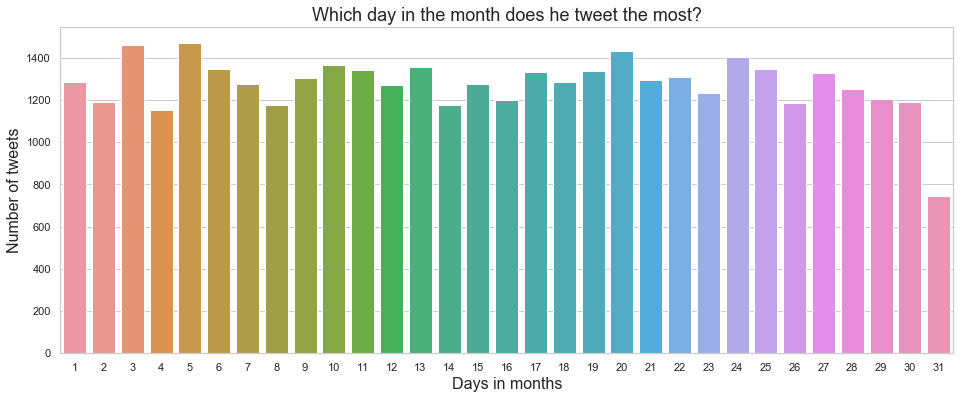

In [18]:
days = tweets_df['tweet_dates'].dt.day
days_value_counts = days.value_counts().sort_index()
plt.figure(figsize = (16,6))
sns.barplot(x = days_value_counts.index, y = days_value_counts.values)
plt.xlabel('Days in months', fontsize = 16)
plt.ylabel('Number of tweets', fontsize = 16)
plt.title('Which day in the month does he tweet the most?', fontsize = 18)

Text(0.5, 1.0, 'What hours in a day does he tweet the most?')

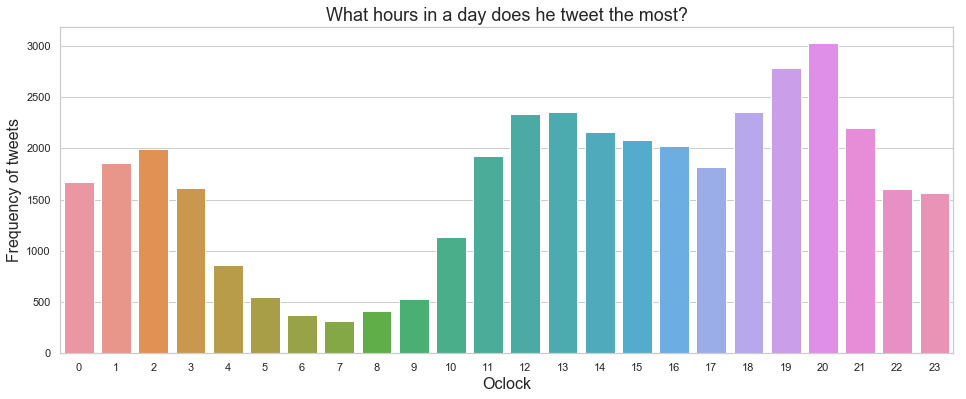

In [19]:
hours_value_count = tweets_df['tweet_dates'].dt.hour.value_counts()
plt.figure(figsize = (16,6))
sns.barplot(x = hours_value_count.index, y = hours_value_count.values)
plt.xlabel('Oclock', fontsize = 16)
plt.ylabel('Frequency of tweets', fontsize = 16)
plt.title('What hours in a day does he tweet the most?', fontsize = 18)

In [20]:
engage_mean = tweets_df.groupby(tweets_df['tweet_dates'].dt.year).mean()
engage_mean.drop(columns = ['is_retweet'], inplace = True)
engage_mean['retweet_count'] = np.log(engage_mean['retweet_count'])
engage_mean['favorite_count'] = np.log(engage_mean['favorite_count'])

Text(0.5, 1.0, 'Engagement over the years')

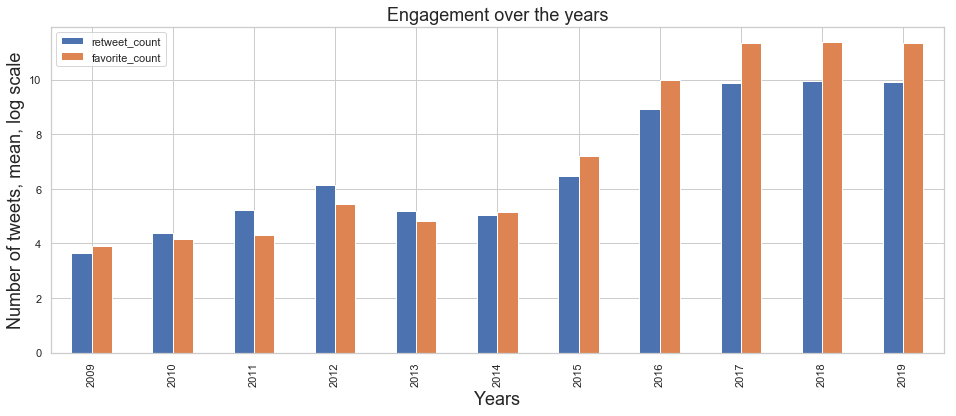

In [21]:
engage_mean.plot(kind = 'bar', figsize = (16,6))
plt.ylabel('Number of tweets, mean, log scale', fontsize = 18)
plt.xlabel('Years', fontsize = 18)
plt.title('Engagement over the years', fontsize = 18)

Text(0.5, 1.0, 'Followers Enagement')

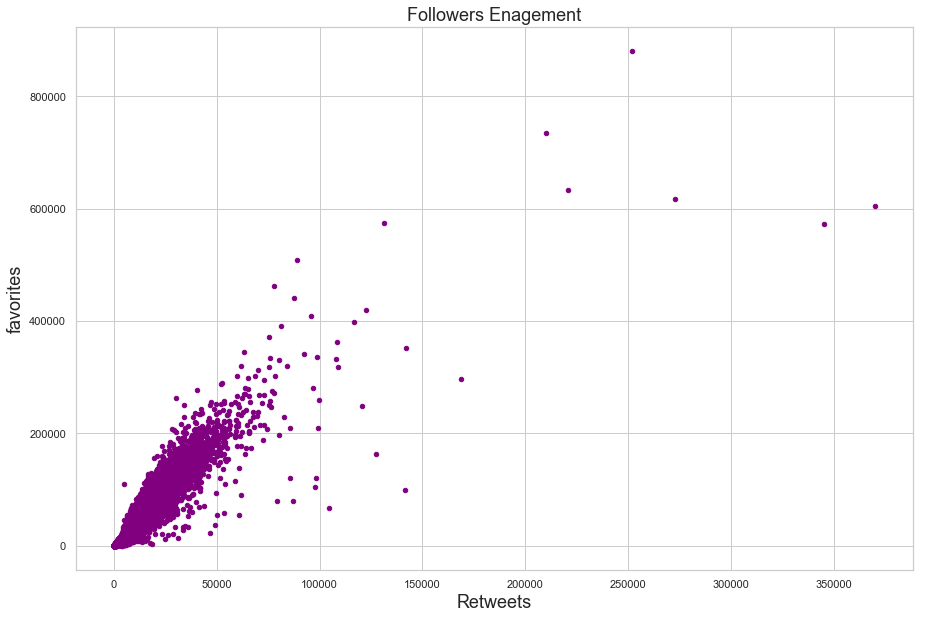

In [22]:
tweets_df.plot(kind = 'scatter', x = 'retweet_count', y = 'favorite_count', figsize = (15,10), c = 'purple')
plt.xlabel('Retweets', fontsize = 18)
plt.ylabel('favorites', fontsize = 18)
plt.title('Followers Enagement', fontsize = 18)

Text(0.5, 1.0, 'Corrolation between types of engagement')

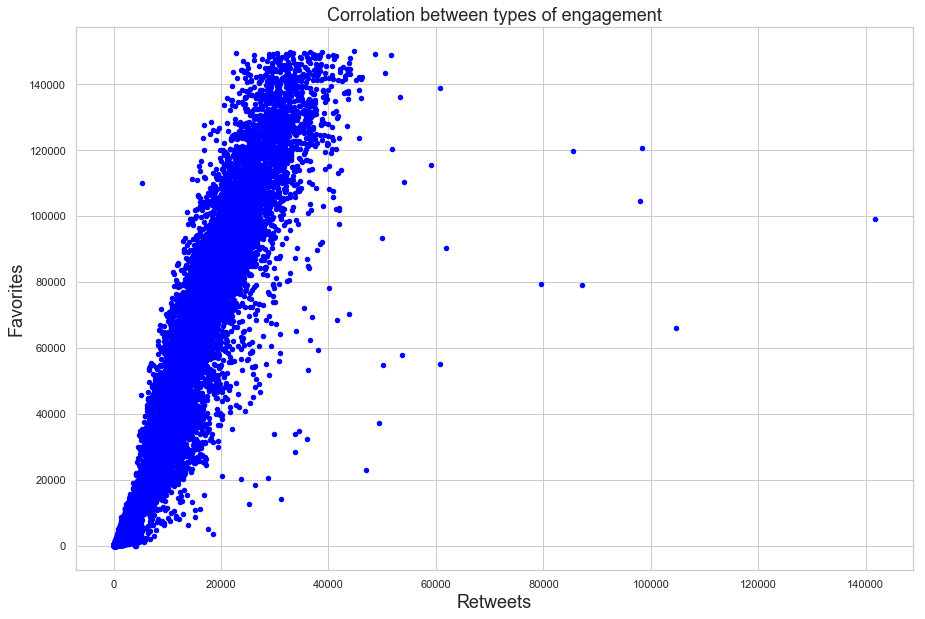

In [23]:
outlier_release_mask = (tweets_df['retweet_count'] < 150000) & (tweets_df['favorite_count'] < 150000)
tweets_df[outlier_release_mask].plot(kind = 'scatter', x = 'retweet_count', y = 'favorite_count', figsize = (15,10), c = 'blue')
plt.xlabel('Retweets', fontsize = 18)
plt.ylabel('Favorites', fontsize = 18)
plt.title('Corrolation between types of engagement', fontsize = 18)

In [24]:
tweets_df['favorite_count'].describe()

count     39547.000000
mean      23345.044428
std       42511.134725
min           0.000000
25%          28.000000
50%         230.000000
75%       31602.500000
max      879647.000000
Name: favorite_count, dtype: float64

In [25]:
tweets_df['retweet_count'].describe()

count     39547.000000
mean       5887.753154
std       10766.530038
min           0.000000
25%          22.000000
50%         295.000000
75%        9265.000000
max      369530.000000
Name: retweet_count, dtype: float64

In [26]:
tweets_df[tweets_df['favorite_count'] == 879647]

,source,text,retweet_count,favorite_count,is_retweet,tweet_dates
1821,Twitter for iPhone,A$AP Rocky released from prison and on his way...,251530.0,879647.0,False,2019-08-02 17:41:30


In [27]:
tweets_df[tweets_df['retweet_count']==369530]

,source,text,retweet_count,favorite_count,is_retweet,tweet_dates
8582,Twitter for iPhone,#FraudNewsCNN #FNN LINK,369530.0,605098.0,False,2017-07-02 13:21:42


Text(0.5, 1.0, 'What year did he have lowest favorite engagement?')

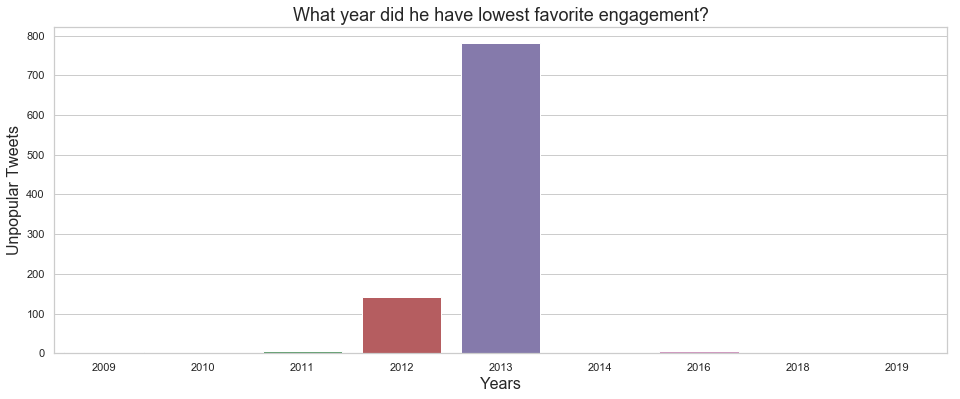

In [28]:
unpopular_tweets = tweets_df[tweets_df['favorite_count'] == 0]
unpopular_tweets_vc = unpopular_tweets['tweet_dates'].dt.year.value_counts()
plt.figure(figsize = (16,6))
sns.barplot(x = unpopular_tweets_vc.index, y = unpopular_tweets_vc.values)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Unpopular Tweets', fontsize = 16)
plt.title('What year did he have lowest favorite engagement?', fontsize = 18)

Text(0.5, 1.0, 'What year did he have lowest retweet engagement?')

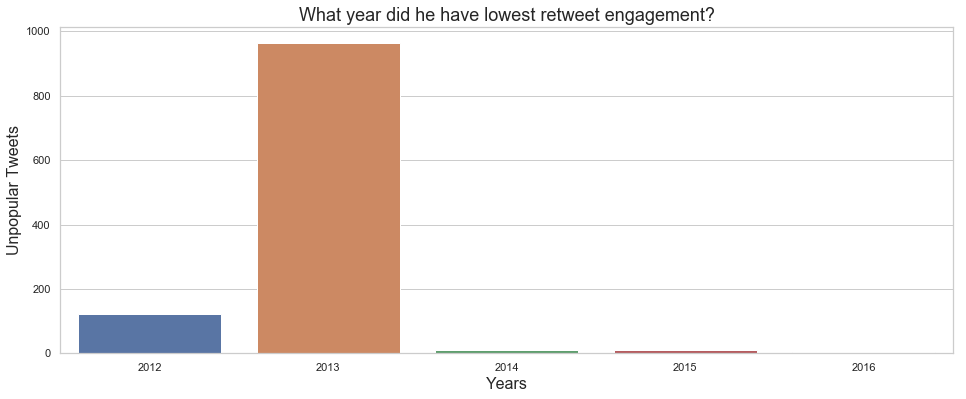

In [29]:
unpopular_tweets_1 = tweets_df[tweets_df['retweet_count'] == 0]
unpopular_tweets_1_vc = unpopular_tweets_1['tweet_dates'].dt.year.value_counts()
plt.figure(figsize = (16,6))
sns.barplot(x = unpopular_tweets_1_vc.index, y = unpopular_tweets_1_vc.values)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Unpopular Tweets', fontsize = 16)
plt.title('What year did he have lowest retweet engagement?', fontsize = 18)

Text(0.5, 1.0, 'Zero Engagement Tweets')

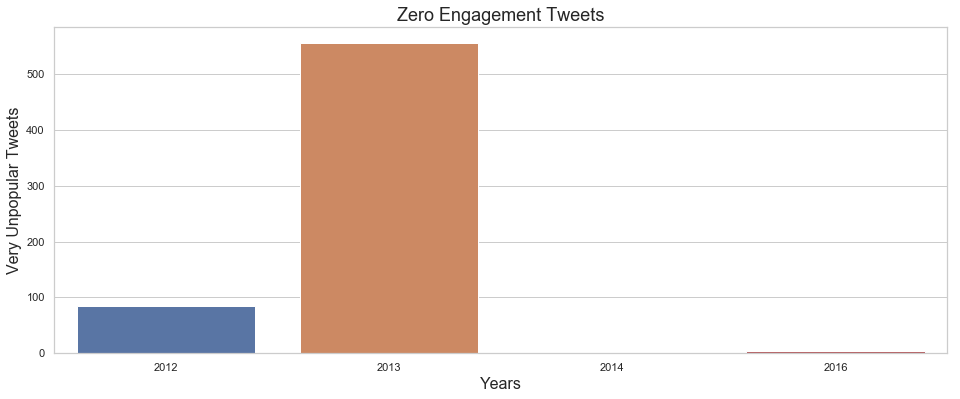

In [30]:
super_unpopular_tweets = tweets_df[(tweets_df['favorite_count'] == 0) & (tweets_df['retweet_count'] == 0)]
vunpopular_tweets_vc = super_unpopular_tweets['tweet_dates'].dt.year.value_counts()
plt.figure(figsize = (16,6))
sns.barplot(x = vunpopular_tweets_vc.index, y =vunpopular_tweets_vc.values)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Very Unpopular Tweets', fontsize = 16)
plt.title('Zero Engagement Tweets', fontsize = 18)

In [31]:
#tweets_df.hist(column ='favorite_count', by =tweets_df['tweet_dates'].dt.year, sharex= True, sharey = True, layout = (6,2));

In [32]:
'''
plt.figure(figsize = (15,6))
dis_graph = sns.distplot(year, hist = True, color = 'darkred', bins = 10, kde = False)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Number of tweets', fontsize=18)
'''

"\nplt.figure(figsize = (15,6))\ndis_graph = sns.distplot(year, hist = True, color = 'darkred', bins = 10, kde = False)\nplt.xlabel('Years', fontsize=18)\nplt.ylabel('Number of tweets', fontsize=18)\n"

In [33]:
presidency_years = tweets_df['tweet_dates'].dt.year.values >= 2016

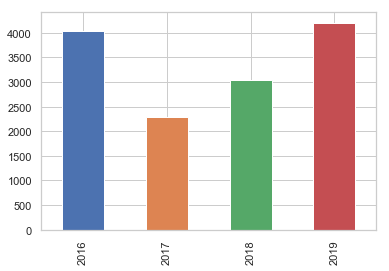

In [34]:
tweets_df[presidency_years]['tweet_dates'].dt.year.value_counts().sort_index().plot(kind = 'bar')

In [35]:
tweets_during_presidency = tweets_df[presidency_years].shape[0]
total_tweets = tweets_df.shape[0]
(tweets_during_presidency/total_tweets ) * 100

34.34647381596581

In [36]:
def threads(tweet):
    string = '...'
    if string in tweet:
        return True
    return False
thread_tweets = tweets_df['text'].apply(threads)
tweets_df[thread_tweets].shape

(3028, 6)